In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

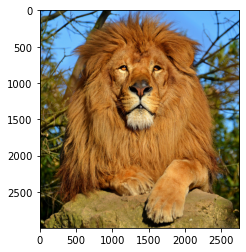

In [38]:
img = cv2.cvtColor(cv2.imread('lion.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

We verify the shape of the image
The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color):

In [39]:
img.shape

(2995, 2748, 3)

In [76]:
def image_size(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'jpeg')
    return img_file.tell()/1024
print("Image size: {:.1f}KB".format(imageSize(img)))

Image size: 1497.2KB


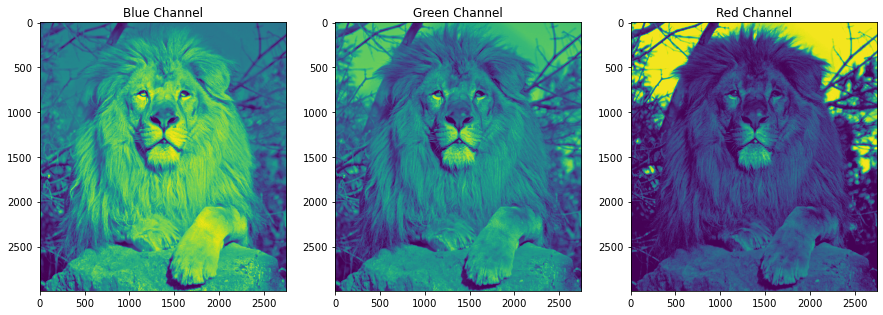

In [42]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(1,3,1)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(1,3,3)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

We verify the data of the blue frame

In [43]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747
0,82,80,83,80,82,88,82,68,62,63,...,83,86,87,83,85,88,91,92,91,85
1,88,84,86,83,81,84,87,74,65,63,...,85,90,87,87,90,87,93,92,89,82
2,95,82,83,81,81,81,87,73,60,69,...,84,92,91,87,93,93,89,91,87,92
3,87,83,80,79,79,78,79,69,65,58,...,89,88,97,97,92,96,93,100,88,95
4,92,80,79,86,76,74,66,68,65,61,...,93,88,90,96,96,95,92,90,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,17,20,20,22,12,10,6,5,8,8,...,112,111,106,94,90,121,126,122,121,128
2991,16,16,13,16,15,10,6,16,16,11,...,118,117,116,110,104,117,125,132,125,124
2992,17,19,16,18,15,9,6,17,12,16,...,116,115,113,118,113,102,114,128,138,138
2993,20,16,19,18,9,10,12,21,7,15,...,115,113,117,128,111,105,114,120,130,139


In [47]:
print(blue_temp_df.max().max())
print(blue_temp_df.min().min())

255
0


We notice that the data varies between 0 and 255 which is the color of each pixel

We devide all channels by 255 so that the data is scaled between 0 and 255

In [49]:
df_blue = blue/255
df_green = green/255
df_red = red/255

### Fit and transform the data in PCA

In [ ]:
cm = 50 # number of components to keep

pca_b = PCA(n_components=cm)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=cm)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=cm)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

Let's check the new shapes

In [54]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(2995, 50)
(2995, 50)
(2995, 50)


Let’s check the sum of explained variance ratios of the 50 PCA components (i.e. most dominated 50 Eigenvalues) for each channel.

In [55]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.8323867575073925
Green Channel: 0.8315248088004072
Red Channel  : 0.9294475971497039


This means we preserve around 86% by keeping 50 components

Let's plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels

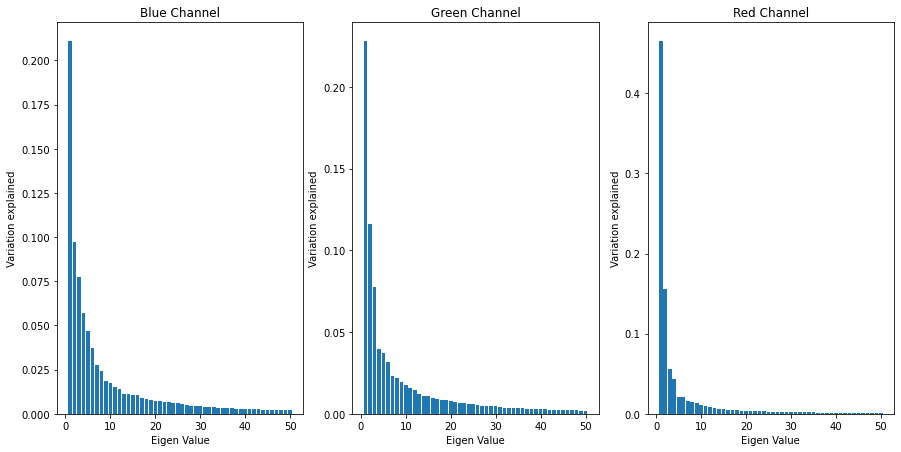

In [56]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)

plt.show()

the PCA dimensionality reduction is done.

In order to visualize the image again we have to reverse transform the data then merge the data of the three channels into one.

In [58]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

print(b_arr.shape, g_arr.shape, r_arr.shape)

(2995, 2748) (2995, 2748) (2995, 2748)


In [65]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
img_reduced = cv2.normalize(img_reduced, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(img_reduced.shape)

(2995, 2748, 3)


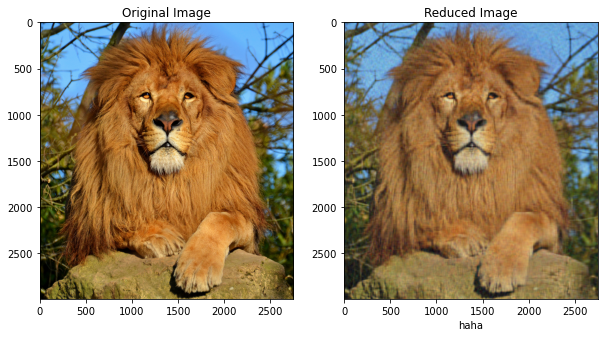

In [72]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)

plt.show()

Let's make a reusable function from the code above

In [105]:
def compress_img(img_path, cm=50):
    """
    img_path: path to the image to compress
    cm: components to leave, default: 50
    """
    
    # load image
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    
    # split image to the three channels
    blue,green,red = cv2.split(img)
    
    # data scaling
    df_blue = blue/255
    df_green = green/255
    df_red = red/255

    # fit and transform data
    pca_b = PCA(n_components=cm)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)

    pca_g = PCA(n_components=cm)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)

    pca_r = PCA(n_components=cm)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)

    # calculate sum of explained variance ratios, which is the explained variance of the whole data
    explained_variance = (sum(pca_r.explained_variance_ratio_) + 
                          sum(pca_g.explained_variance_ratio_) +
                          sum(pca_b.explained_variance_ratio_))/3
    
    
    # inverse transform transformed data
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)
    
    # merge final data
    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

    # plot the original image and reduced image
    fig = plt.figure(figsize = (10, 7.2)) 
    fig.add_subplot(121)
    plt.title("Original Image")
    plt.xlabel("Explained variance: 100%\nImage size: {:.1f}KB".format(image_size(img)))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    fig.add_subplot(122)
    plt.title("Reduced Image")
    plt.xlabel("Explained variance: {:.2f}%\nImage size: {:.1f}KB".format(explained_variance*100, image_size(img_reduced*255)))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_reduced)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


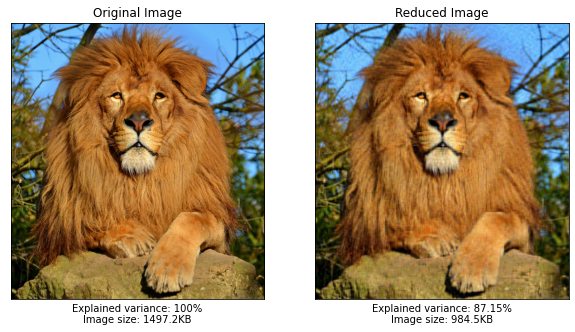

In [108]:
compress_img('lion.jpg', 55)